Question 2

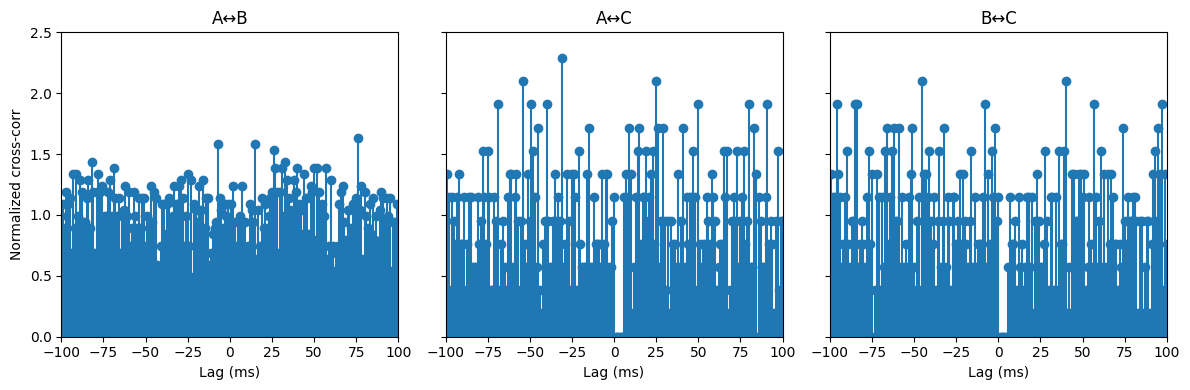

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Simulation parameters
dt    = 0.001      # 1 ms resolution
T     = 50.0       # 50 s total duration
n_bins = int(T/dt)

# 2) Baseline rates (Hz)
rC, rA, rB = 5, 20, 20

# 3) Simulate C (common inhibitory) spike train
pC      = rC * dt
spikesC = (np.random.rand(n_bins) < pC).astype(int)

# 4) Build A & B time-varying rates (5 ms inhibition after each C spike)
rateA = np.ones(n_bins) * rA
rateB = np.ones(n_bins) * rB
for idx in np.where(spikesC)[0]:
    start = idx + 1
    end   = min(idx + 6, n_bins)
    rateA[start:end] = 0
    rateB[start:end] = 0

# 5) Generate A & B Poisson spike trains
spikesA = (np.random.rand(n_bins) < rateA * dt).astype(int)
spikesB = (np.random.rand(n_bins) < rateB * dt).astype(int)

# 6) Cross‐correlation function (normalized by second train's rate)
def norm_xcorr(s1, s2, max_lag_ms):
    ac = np.correlate(s1, s2, mode='full')
    center = len(ac)//2
    win = ac[center - max_lag_ms : center + max_lag_ms + 1]
    mean_rate = s2.sum() / T
    return win / mean_rate, np.arange(-max_lag_ms, max_lag_ms+1)

# 7) Compute ±100 ms correlations
max_lag = 100
xcAB, lags = norm_xcorr(spikesA, spikesB, max_lag)
xcAC, _    = norm_xcorr(spikesA, spikesC, max_lag)
xcBC, _    = norm_xcorr(spikesB, spikesC, max_lag)

# 8) Plot
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
for ax, data, title in zip(axs, [xcAB, xcAC, xcBC], ['A↔B', 'A↔C', 'B↔C']):
    ax.stem(lags, data, linefmt='C0-', markerfmt='C0o', basefmt=' ')
    ax.set_title(title)
    ax.set_xlim(-100, 100)
    ax.set_ylim(0, 2.5)
    ax.set_xlabel("Lag (ms)")
axs[0].set_ylabel("Normalized cross-corr")
plt.tight_layout()
plt.show()
